In [1]:
# plot within the notebook
%matplotlib inline

# plotting library in python
import matplotlib.pyplot as plt

# library for numerical calculation
import numpy as np

# data analysis library in python
import pandas as pd

In [2]:
# Loading the data as pandas dataframe (df)
df = pd.read_csv('./Datasets/kfda_data.csv', header = None)
df.columns = ['x1', 'x2', 'classes']

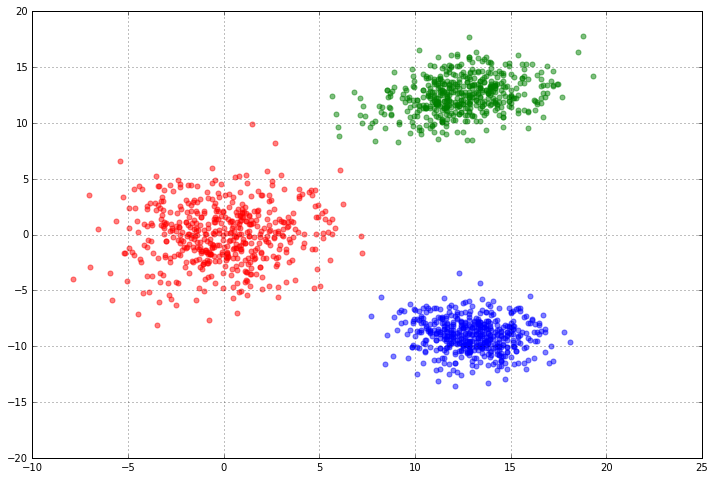

In [3]:
# plot the actual data points
plt.figure(figsize = (12,8))

# class 1
x = df['x1'][df['classes'] == 1], # x1 as the x axis
y = df['x2'][df['classes'] == 1], # x2 as the y axis
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'r',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# class 2
x = df['x1'][df['classes'] == 2], # x1 as the x axis
y = df['x2'][df['classes'] == 2], # x2 as the y axis
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'g',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# class 3
x = df['x1'][df['classes'] == 3], # x1 as the x axis
y = df['x2'][df['classes'] == 3], # x2 as the y axis
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'b',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# show the plot
plt.grid(True)
plt.show()

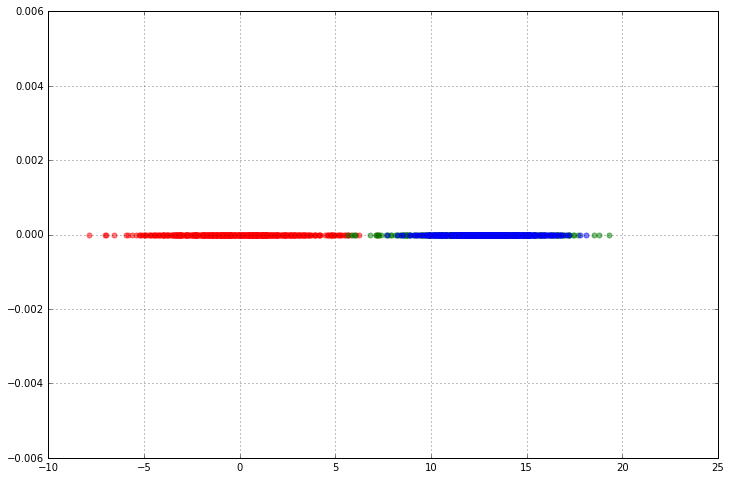

In [4]:
# plot the data points with the reduction of x2 feature
plt.figure(figsize = (12, 8))

# class 1
x = df['x1'][df['classes'] == 1], # x1 as the x axis
y = np.zeros(500)
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'r',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# class 2
x = df['x1'][df['classes'] == 2], # x1 as the x axis
y = np.zeros(500)
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'g',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# class 3
x = df['x1'][df['classes'] == 3], # x1 as the x axis
y = np.zeros(500)
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'b',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# show the plot
plt.grid(True)
plt.show()

In [5]:
# This function calculates scatter matrices:
#     sB = between class scatter matrix
#     sW = within class scatter matrix

def findScatter(features, label): # features = [x1 x2], label = classes
    # number of features
    numOfFeatures = features.ndim
        
    # unique classes
    classes = label.classes.unique()
    numOfClasses = len(classes)
    
    # initialization of within class scatter matrix
    sW = np.zeros((numOfFeatures, numOfFeatures))

    # initialization of between class scatter matrix
    sB = np.zeros((numOfFeatures, numOfFeatures))
   
    # mean of each feature
    meanOverall = features.mean()
    
    X = df.ix[:, 0:2].values
    Y = df.ix[:, 2].values
    classI = []
    
    for idx, aclass in enumerate(classes):
        # find data for each class
        # classI = (label == classes[i])
        classI.append(X[Y == aclass, ])

        # calculating mean of each feature for respective class 
        meanClassI = np.mean(classI[idx], axis = 0)
        
        # difference of each data point
        diffClassIMeanClassI = classI[idx] - meanClassI
        
        # calculate within class scatter matrix
        sW = sW + (diffClassIMeanClassI.T).dot(diffClassIMeanClassI)
        
        # calculate between class scatter matrix
        diffMeanClassIMeanOverall = np.reshape(meanClassI - meanOverall, (1, 2))
        sB = sB + len(classI[idx]) * ((diffMeanClassIMeanOverall.T).dot(diffMeanClassIMeanOverall))
        
    return sW, sB

In [6]:
# numpy linear algebra
from numpy import linalg as LA

# separate features (X) from classes (Y)
X = df.loc[:, ['x1','x2']]
# separate classes from features
Y = df.loc[:, ['classes']]

# find scatter matices - sW and sB
sW, sB = findScatter(X, Y)
# print sW, sB

# Find eigen values(w) and eigen vectors(v)
temp = LA.inv(sW) * (sB)
w, v = LA.eig(temp)

# sort eigen vectors according to the decreasing order of eigen values
v = np.fliplr(v)

# number of dimensions required in reduced form
numOfDimensions = 1
w = v[:, 0 : numOfDimensions]

# X transpose for multiplication
X = X.T
# calculating Y
Y = (w.T).dot(X)
# Y transpose for plotting
Y = Y.T

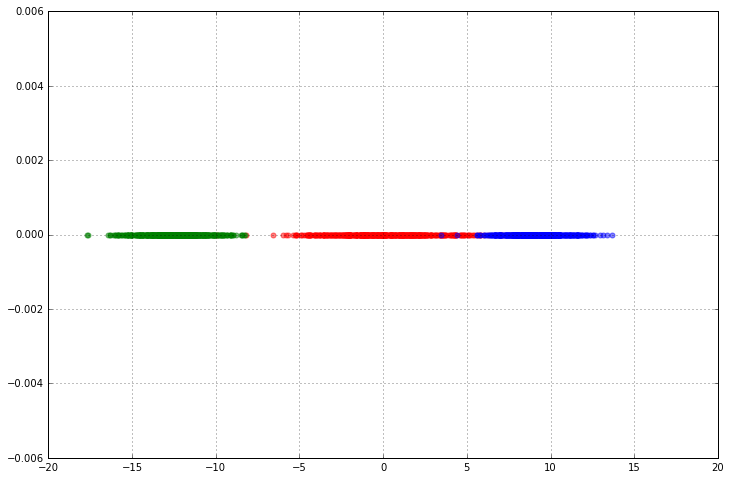

In [7]:
# plot the data points applying KFDA
plt.figure(figsize = (12, 8))

# class 1
x = Y[0:500, 0],
y = np.zeros(500)
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'r',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# class 2
x = Y[500:1000, 0]
y = np.zeros(500)
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'g',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# class 3
x = Y[1000:1500, 0]
y = np.zeros(500)
plt.scatter(x, y,
            # the marker as
            marker = '.',
            # the color
            color = 'b',
            # the alpha
            alpha = 0.5,
            # with size
            s = 100)

# show the plot
plt.grid(True)
plt.show()